# Final Project

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## Your assignment

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* And, as a bonus challenge, a neural network using Keras.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember some techniques such as SVM also require the input data to be normalized first.

Many techniques also have "hyperparameters" that need to be tuned. Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

I was able to achieve over 80% accuracy - can you beat that?

Below I've set up an outline of a notebook for this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!


## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

feature_names =  ['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity']


data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = feature_names)
data.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [78]:
#TODO: Sprawdzić czy jest korelacja pomiędzy atrybutami aby nie być stroniczym w wybieraniu danych
data.describe()

,BI_RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [79]:
data.loc[
    (data['age'].isnull()) |
    (data['shape'].isnull()) |
    (data['margin'].isnull()) |
    (data['density'].isnull())  
]

,BI_RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
9,5.0,60.0,NaN,5.0,1.0,1
12,4.0,64.0,1.0,NaN,3.0,0
19,4.0,40.0,1.0,NaN,NaN,0
20,NaN,66.0,NaN,NaN,1.0,1
22,4.0,43.0,1.0,NaN,NaN,0


There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

In [80]:
data.dropna(inplace=True)

If the missing data seems randomly distributed, go ahead and drop rows with missing data. Hint: use dropna().

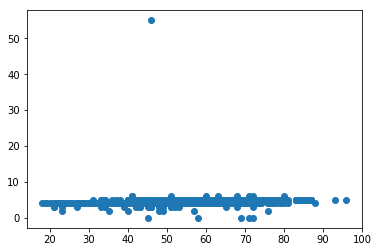

array([[ 215.2611929 ,    2.62160391],
       [   2.62160391,    3.56594678]])

In [81]:
#TODO: weź tylko BI_RADS i age
#pyplot.hist(data)
#pyplot.show()

pyplot.scatter(data['age'].values, data['BI_RADS'].values)
pyplot.show()

#scatter(data['age'].values, data['BI_RADS'].values)
#covariance (pageSpeeds, purchaseAmount)
np.cov (data['age'].values, data['BI_RADS'].values)

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [82]:
all_features = data[['age', 'shape', 'margin', 'density']].values
all_classes = data['severity'].values
feature_names = ['age', 'shape', 'margin', 'density']

print(all_features)

[[ 67.   3.   5.   3.]
 [ 58.   4.   5.   3.]
 [ 28.   1.   1.   3.]
 ..., 
 [ 64.   4.   5.   3.]
 [ 66.   4.   5.   3.]
 [ 62.   3.   3.   3.]]


Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [83]:
from sklearn.preprocessing import StandardScaler

print(all_features)
print("\n")

#Zeskalowane wartości - potrzebne dla niektórych modeli
scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

print(all_features_scaled)

[[ 67.   3.   5.   3.]
 [ 58.   4.   5.   3.]
 [ 28.   1.   1.   3.]
 ..., 
 [ 64.   4.   5.   3.]
 [ 66.   4.   5.   3.]
 [ 62.   3.   3.   3.]]


[[ 0.7650629   0.17563638  1.39618483  0.24046607]
 [ 0.15127063  0.98104077  1.39618483  0.24046607]
 [-1.89470363 -1.43517241 -1.157718    0.24046607]
 ..., 
 [ 0.56046548  0.98104077  1.39618483  0.24046607]
 [ 0.69686376  0.98104077  1.39618483  0.24046607]
 [ 0.42406719  0.17563638  0.11923341  0.24046607]]


## Decision Trees

Before moving to K-Fold cross validation and random forests, start by creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [84]:
#tworzę kopie danych
all_features_trees = all_features.copy()
all_classes_trees = all_classes.copy()

train_length = round(len(all_features_trees)*0.75)
test_length = round(len(all_features_trees)*0.25)


train_features_trees = all_features_trees[:train_length]
train_classes_trees = all_classes_trees[:train_length]


test_features_trees = all_features_trees[-test_length:]
test_classes_trees = all_classes_trees[-test_length:]

# aa = [1,2,3,4,5,6,7,8]
# print(aa[:2])
# print(aa[-6:])
# print(aa[:-3])

# == Lepsze rozwiązanie na podział ==

# import numpy
# from sklearn.model_selection import train_test_split

# numpy.random.seed(1234) - aby zduplikować rezultaty tak jak jest na filmiku

# (train_features_trees,
#  test_features_trees,
#  train_classes_trees,  
#  test_classes_trees) = train_test_split(all_features_scaled, all_classes_trees, train_size=0.75, random_state=1)

Now create a DecisionTreeClassifier and fit it to your training data.

In [85]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=1) #bez random_state dało lekko lepsze wyniki
clf = clf.fit(train_features_trees, train_classes_trees)

Display the resulting decision tree.

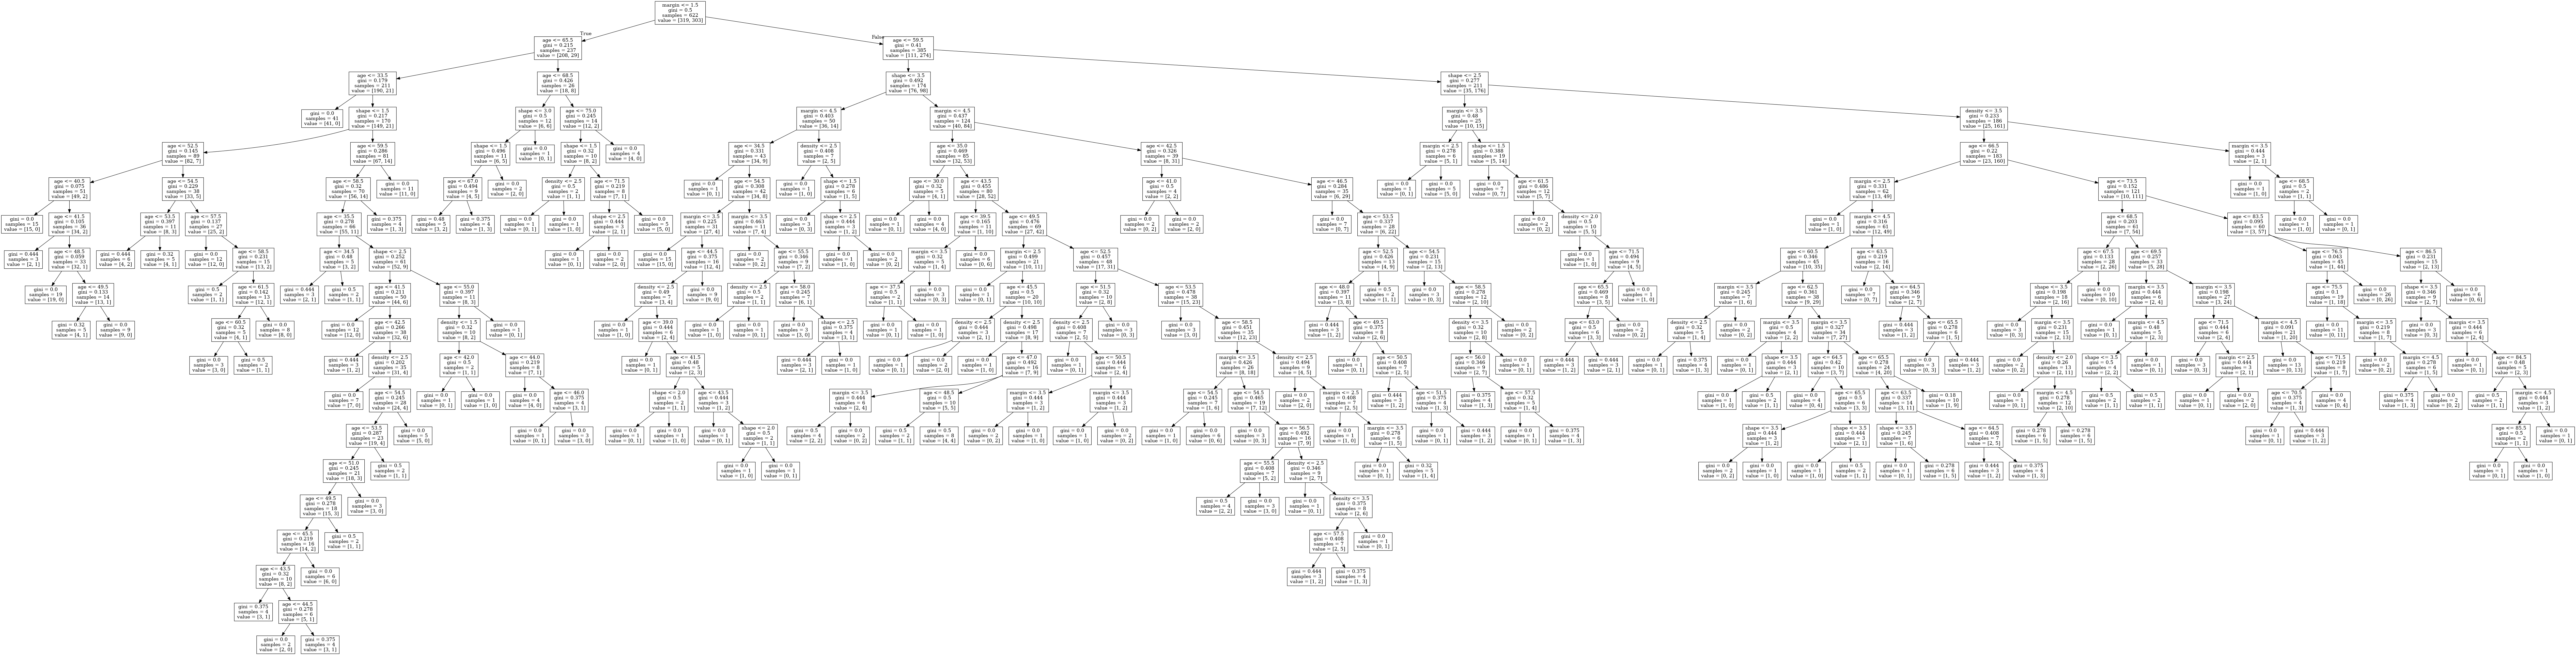

In [86]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  

tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Measure the accuracy of the resulting decision tree model using your test data.

In [87]:
clf.predict(test_features_trees)

# clf.predict_proba(test_features_trees)
clf.score(test_features_trees, test_classes_trees)

#srednio 72% dokładności

0.71634615384615385

Now instead of a single train/test split, use K-Fold cross validation to get a better measure of your model's accuracy (K=10). Hint: use model_selection.cross_val_score

In [88]:
# wyk. 51
# Jest to inny sposób podziału przy przewidywaniu wyniku?
# Jedem ze sposobów obronienia się przed "przejedzeniem"
from sklearn.model_selection import cross_val_score

#cv=15 dało lepszy wynik 74%
#cv=25 dało lepszy wynik 76%
scores = cross_val_score(clf, all_features, all_classes, cv=10)
# w cross_val_score daje się cały dataset!

print(scores)

# ok 73% dokładności
print(scores.mean()) 

[ 0.71428571  0.76190476  0.73809524  0.73493976  0.78313253  0.69879518
  0.72289157  0.76829268  0.75609756  0.69512195]
0.737355694555


Now try a RandomForestClassifier instead. Does it perform better?

In [94]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(test_features_trees, test_classes_trees)

# srednia 94% - działa lepiej niż pojedyncze drzewo
clf.score(test_features_trees, test_classes_trees)


0.94230769230769229

## SVM

Next try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [98]:
#tworzę kopie danych
all_features_svm = all_features.copy()
all_classes_svm = all_classes.copy()

train_length = round(len(all_features_svm)*0.75)
test_length = round(len(all_features_svm)*0.25)


train_features_svm = all_features_svm[:train_length]
train_classes_svm = all_classes_svm[:train_length]


test_features_svm = all_features_svm[-test_length:]
test_classes_svm = all_classes_svm[-test_length:]

In [137]:
from sklearn import svm

svc = svm.SVC(C=1.0, kernel='linear').fit(train_features_svm, train_classes_svm)

svc.predict(test_features_svm)

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1])

In [138]:
# średnio 80% przy kernel='rbf'
# średnio 80% przy kernel='linear'
# długo liczy przy kernel='poly'
# średnio 51% przy kernel='sigmoid'
# nie dziala przy kernel='precomputed' 

# svc.score(test_features_svm, test_classes_svm)



# średnio 79 przy cv=5
# średnio 79 przy cv=10
# średnio 79 przy cv=15
# średnio 79 przy cv=25
scores = cross_val_score(svc, all_features, all_classes, cv=25) # na filmiku używał all_features_scaled
scores.mean()

0.79446498599439763

## KNN
How about K-Nearest-Neighbors? Hint: use neighbors.KNeighborsClassifier - it's a lot easier than implementing KNN from scratch like we did earlier in the course. Start with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [139]:
#tworzę kopie danych
all_features_neighbors = all_features.copy()
all_classes_neighbors = all_classes.copy()

train_length = round(len(all_features_neighbors)*0.75)
test_length = round(len(all_features_neighbors)*0.25)


train_features_neighbors = all_features_neighbors[:train_length]
train_classes_neighbors = all_classes_neighbors[:train_length]


test_features_neighbors = all_features_neighbors[-test_length:]
test_classes_neighbors = all_classes_neighbors[-test_length:]

In [159]:
from sklearn import neighbors

# neighbors = neighbors.KNeighborsClassifier(n_neighbors=10).fit(train_features_neighbors, train_classes_neighbors)

# svc.predict(test_features_neighbors)

# ok 77% przy K-n=5
# ok 79% przy K-n=10
# ok 79% przy K-n=15
# ok 79% przy K-n=25

# neighbors.score(test_features_neighbors, test_classes_neighbors)



# średnio 79 przy cv=10 przy K-n=5
# średnio 78 przy cv=15 przy K-n=5
# średnio 78 przy cv=10 przy K-n=10

# scores = cross_val_score(neighbors, all_features, all_classes, cv=10) # na filmiku używał all_features_scaled
# scores.mean()

Choosing K is tricky, so we can't discard KNN until we've tried different values of K. Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference. Make a note of the best performance you could get out of KNN.

In [188]:
# najlepszy wynik 0.792
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features, all_classes, cv=10)
    print(n, cv_scores.mean())


1 0.740985894799
2 0.690305822594
3 0.777089193009
4 0.742262079678
5 0.790415669647
6 0.773531757693
7 0.792796272197
8 0.777059457342
9 0.780761373018
10 0.780775716105
11 0.773546100779
12 0.779600282664
13 0.776000167919
14 0.782038957223
15 0.776014860837
16 0.772414746092
17 0.786873976743
18 0.774824734478
19 0.788049760016
20 0.784449995102
21 0.784493024362
22 0.783259169081
23 0.779673747254
24 0.780849880358
25 0.78083518744
26 0.78803576676
27 0.783230482907
28 0.781981934707
29 0.778367127045
30 0.77714761485
31 0.77720603669
32 0.774796048305
33 0.776001217413
34 0.774796747967
35 0.777177350517
36 0.782026013462
37 0.781996977457
38 0.783259868743
39 0.782026013462
40 0.779630717994
41 0.779601681989
42 0.779630717994
43 0.778411205799
44 0.778425898717
45 0.777191693604
46 0.773576885941
47 0.775986874327
48 0.774825434141
49 0.778425898717


## Naive Bayes

Now try naive_bayes.MultinomialNB. How does its accuracy stack up? Hint: you'll need to use MinMaxScaler to get the features in the range MultinomialNB requires.

In [177]:
#tworzę kopie danych
all_features_bayes = all_features.copy()
all_classes_bayes = all_classes.copy()

train_length = round(len(all_features_bayes)*0.75)
test_length = round(len(all_features_bayes)*0.25)


train_features_bayes = all_features_bayes[:train_length]
train_classes_bayes = all_classes_bayes[:train_length]


test_features_bayes = all_features_bayes[-test_length:]
test_classes_bayes = all_classes_bayes[-test_length:]

In [180]:
from sklearn import naive_bayes
from sklearn import preprocessing

#nb = naive_bayes.MultinomialNB().fit(train_features_bayes, train_classes_bayes)

#nb.predict(test_features_bayes)

# 77%
#print(nb.score(test_features_bayes, test_classes_bayes))


# 76%
#nb_scores = cross_val_score(nb, all_features_trees, all_classes_trees, cv=10)
#nb_scores.mean()


# 78%
# TODO: sprawdzić po co się transformuje i dlaczego taki transformer??
scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(all_features)

nb = naive_bayes.MultinomialNB()
nb_scores = cross_val_score(nb, all_features_minmax, all_classes, cv=10)
nb_scores.mean()

0.78440556651693882

## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is. Do we have a new winner?

In [ ]:
# Mam to wyżej
# rpf i linear dają te same wyniki

## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [182]:
#tworzę kopie danych
all_features_lr = all_features.copy()
all_classes_lr = all_classes.copy()

train_length = round(len(all_features_lr)*0.75)
test_length = round(len(all_features_lr)*0.25)


train_features_lr = all_features_lr[:train_length]
train_classes_lr = all_classes_lr[:train_length]


test_features_lr = all_features_lr[-test_length:]
test_classes_lr = all_classes_lr[-test_length:]

In [184]:
from sklearn import linear_model


lr = linear_model.LogisticRegression()
lr.fit(train_features_lr, train_classes_lr)

lr.predict(test_features_lr)

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1])

In [192]:
# 81%
lr.score(test_features_lr, test_classes_lr)

# 79%
nb_scores = cross_val_score(lr, all_features, all_classes, cv=10)
nb_scores.mean()

# 80%
nb_scores = cross_val_score(lr, all_features_scaled, all_classes, cv=10)
nb_scores.mean()

0.80735835327372207

## Neural Networks

As a bonus challenge, let's see if an artificial neural network can do even better. You can use Keras to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary.

In [107]:
#tworzę kopie danych
all_features_nn = all_features.copy()
all_classes_nn = all_classes.copy()

train_length = round(len(all_features_nn)*0.75)
test_length = round(len(all_features_nn)*0.25)


train_features_nn = all_features_nn[:train_length]
train_classes_nn = all_classes_nn[:train_length]


test_features_nn = all_features_nn[-test_length:]
test_classes_nn = all_classes_nn[-test_length:]

In [108]:
scaler = StandardScaler()

train_features_nn_scaled = scaler.fit_transform(train_features_nn)
# train_classes_nn_scaled = scaler.fit_transform(train_classes_nn)

test_features_nn_scaled = scaler.fit_transform(test_features_nn)
# test_classes_nn_scaled = scaler.fit_transform(test_classes_nn)

print(train_features_nn_scaled)

[[ 0.75051441  0.16554455  1.36030791  0.21647119]
 [ 0.14565123  0.96375161  1.36030791  0.21647119]
 [-1.87055939 -1.43086956 -1.17106538  0.21647119]
 ..., 
 [-2.27380152 -1.43086956 -1.17106538  0.21647119]
 [-2.07218046 -0.63266251 -1.17106538  0.21647119]
 [ 0.88492846  0.96375161  0.72746459  0.21647119]]


In [109]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [113]:
def create_model():
    model = Sequential()
    model.add(Dense(6, activation='relu', kernel_initializer='normal', input_dim=4))
    # model.add(Dropout(0.2))
    model.add(Dense(6, activation='sigmoid'))
    # model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [115]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
nn_scores = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
nn_scores.mean()

#dokladność do 48% ( na filmiku było ok 79%) dla 10 epochs

0.48554216939282702

In [112]:
model.fit(train_features_nn, train_classes_nn,
          batch_size=4,
          epochs=5,
          verbose=2,
          validation_data=(test_features_nn, test_classes_nn))


score, acc = model.evaluate(test_features_nn, test_classes_nn, verbose=0)
print('\n')
print('Test score:', score)
print('Test accuracy:', acc)
print('\n')

#dokladność do 48%

Train on 622 samples, validate on 208 samples
Epoch 1/5
 - 6s - loss: 8.1762 - acc: 0.4871 - val_loss: 8.2778 - val_acc: 0.4808
Epoch 2/5
 - 0s - loss: 8.1762 - acc: 0.4871 - val_loss: 8.2778 - val_acc: 0.4808
Epoch 3/5
 - 0s - loss: 8.1762 - acc: 0.4871 - val_loss: 8.2778 - val_acc: 0.4808
Epoch 4/5
 - 0s - loss: 8.1762 - acc: 0.4871 - val_loss: 8.2778 - val_acc: 0.4808
Epoch 5/5
 - 1s - loss: 8.1762 - acc: 0.4871 - val_loss: 8.2778 - val_acc: 0.4808


Test score: 8.27777723166
Test accuracy: 0.480769230769




## Do we have a winner?

Which model, and which choice of hyperparameters, performed the best? Feel free to share your results!